In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from Handler import *
import os

In [2]:
# path_data = "/Volumes/elmichelangelo_external_ssd_1/Data/gaNdalF_paper_catalogs"
path_data = "/Users/P.Gebhardt/Development/PhD/data"
path_data_master_cat = "/Volumes/elmichelangelo_external_ssd_1/Data/gaNdalF"
filename_flw_balrog = "2024-10-02_10-37_balrog_flw_Test_sample.pkl"
filename_flw_gandalf = "2024-10-02_10-37_gandalf_flw_Test_sample.pkl"
filename_master_cat = "Y3_mastercat_02_05_21.h5"
path_save_plots = "../../Output/gaNdalF_paper"

In [3]:
df_balrog_flw = pd.read_pickle(f"{path_data}/{filename_flw_balrog}")
df_gandalf_flw = pd.read_pickle(f"{path_data}/{filename_flw_gandalf}")

In [4]:
lst_col_mags = ["unsheared/mag_r", "unsheared/mag_i", "unsheared/mag_z"]
for col in lst_col_mags:
    arr_gandalf_flw = df_gandalf_flw[col].to_numpy()
    for i, mag in enumerate(arr_gandalf_flw):
        if mag > 37.5:
            arr_gandalf_flw[i] = 37.5
    df_gandalf_flw[col] = arr_gandalf_flw
    df_gandalf_flw[col].max()

In [5]:
df_gandalf_flw["Color unsheared MAG r-i"] = df_gandalf_flw["unsheared/mag_r"] - df_gandalf_flw["unsheared/mag_i"]
df_gandalf_flw["Color unsheared MAG i-z"] = df_gandalf_flw["unsheared/mag_i"] - df_gandalf_flw["unsheared/mag_z"]

In [6]:
df_gandalf_flw_cut = df_gandalf_flw.copy()
df_gandalf_flw_cut = unsheared_mag_cut(df_gandalf_flw_cut)

Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 6051712


In [7]:
df_balrog_flw_cut = df_balrog_flw.copy()
df_balrog_flw_cut = unsheared_mag_cut(df_balrog_flw_cut)

Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 6075070


In [8]:
print(f"Length of Balrog objects: {len(df_balrog_flw)}")
print(f"Length of gaNdalF objects: {len(df_gandalf_flw)}")
print(f"Length of Balrog objects after mag cut: {len(df_balrog_flw_cut)}")
print(f"Length of gaNdalF objects after mag cut: {len(df_gandalf_flw_cut)}")

Length of Balrog objects: 8616255
Length of gaNdalF objects: 8614806
Length of Balrog objects after mag cut: 6075070
Length of gaNdalF objects after mag cut: 6051712


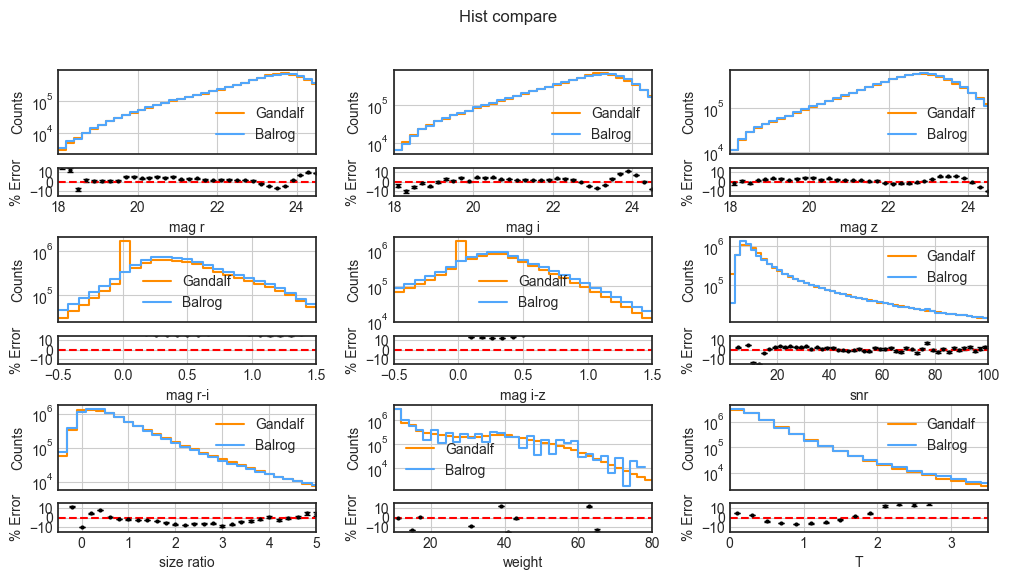

<Figure size 640x480 with 0 Axes>

In [9]:
plot_balrog_histogram_with_error(
    df_gandalf=df_gandalf_flw,
    df_balrog=df_balrog_flw,
    columns=[
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        "unsheared/snr",
        "unsheared/size_ratio",
        "unsheared/weight",
        "unsheared/T"
    ],
    labels=[
        "mag r",
        "mag i",
        "mag z",
        "mag r-i",
        "mag i-z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    ranges=[
        [18, 24.5],  # mag r
        [18, 24.5],  # mag i
        [18, 24.5],  # mag z
        [-0.5, 1.5],  # mag r-i
        [-0.5, 1.5],  # mag i-z
        [2, 100],  # snr
        [-0.5, 5],  # size ratio
        [10, 80],  # weight
        [0, 3.5]  # T
    ],
    binwidths=[
        None,  # mag r
        None,  # mag i
        None,  # mag z
        0.08,  # mag r-i
        0.08,  # mag i-z
        2,  # snr
        0.2,  # size ratio
        2,  # weight
        0.2  # T
    ],
    title="Hist compare",
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/balrog_hist_plot.png"
)

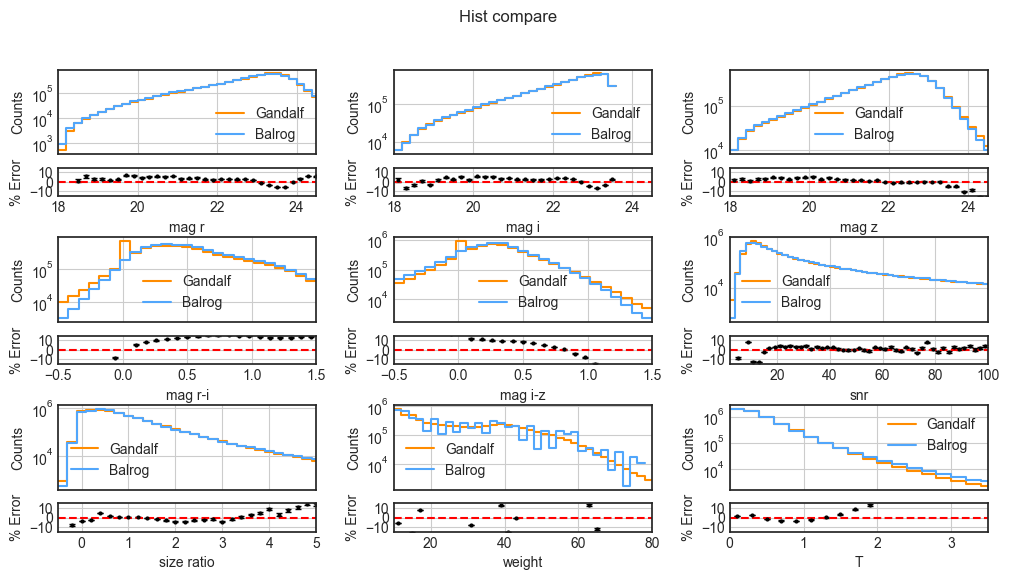

<Figure size 640x480 with 0 Axes>

In [10]:
plot_balrog_histogram_with_error(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    columns=[
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        "unsheared/snr",
        "unsheared/size_ratio",
        "unsheared/weight",
        "unsheared/T"
    ],
    labels=[
        "mag r",
        "mag i",
        "mag z",
        "mag r-i",
        "mag i-z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    ranges=[
        [18, 24.5],  # mag r
        [18, 24.5],  # mag i
        [18, 24.5],  # mag z
        [-0.5, 1.5],  # mag r-i
        [-0.5, 1.5],  # mag i-z
        [2, 100],  # snr
        [-0.5, 5],  # size ratio
        [10, 80],  # weight
        [0, 3.5]  # T
    ],
    binwidths=[
        None,  # mag r
        None,  # mag i
        None,  # mag z
        0.08,  # mag r-i
        0.08,  # mag i-z
        2,  # snr
        0.2,  # size ratio
        2,  # weight
        0.2  # T
    ],
    title="Hist compare",
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/balrog_hist_plot.png"
)

In [9]:
df_gandalf_flw_sub_cut = df_gandalf_flw_cut.sample(n=int(5E5))
df_balrog_flw_sub_cut = df_balrog_flw_cut.sample(n=int(5E5))

df_gandalf_flw_sub = df_gandalf_flw.sample(n=int(5E5))
df_balrog_flw_sub = df_balrog_flw.sample(n=int(5E5))

In [ ]:
plot_compare_seaborn(
    data_frame_generated=df_gandalf_flw_sub,
    data_frame_true=df_balrog_flw_sub,
    dict_delta=None,
    epoch=None,
    title=f"color-color plot",
    columns=[
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        # "unsheared/snr",
        # "unsheared/size_ratio",
        # "unsheared/weight",
        # "unsheared/T"
    ],
    labels=[
        "r-i",
        "i-z",
        "mag r",
        "mag i",
        "mag z",
        # "snr",
        # "size ratio",
        # "weight",
        # "T"
    ],
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/color_color.png",
    ranges={
        "Color unsheared MAG r-i": [-0.5, 1.5],
        "Color unsheared MAG i-z": [-0.5, 1.5],
        "unsheared/mag_r": [18, 24.5],
        "unsheared/mag_i": [18, 24.5],
        "unsheared/mag_z": [18, 24.5],
        # "unsheared/snr": [2, 100],
        # "unsheared/size_ratio": [-0.5, 5],
        # "unsheared/weight": [10, 80],
        # "unsheared/T": [0, 3.5]
    }
)

In [17]:
df_gandalf_flw_sub["Color unsheared MAG r-i"].mean() - df_balrog_flw_sub["Color unsheared MAG r-i"].mean()

np.float64(-0.06757299541240624)

Plot histogram for col unsheared/mag_r. Δmean=2.57e-02
Δmedian=4.10e-02
Plot gandalf kde for col unsheared/mag_i and unsheared/mag_r
Plot histogram for col unsheared/mag_i. Δmean=2.99e-02
Δmedian=3.92e-02


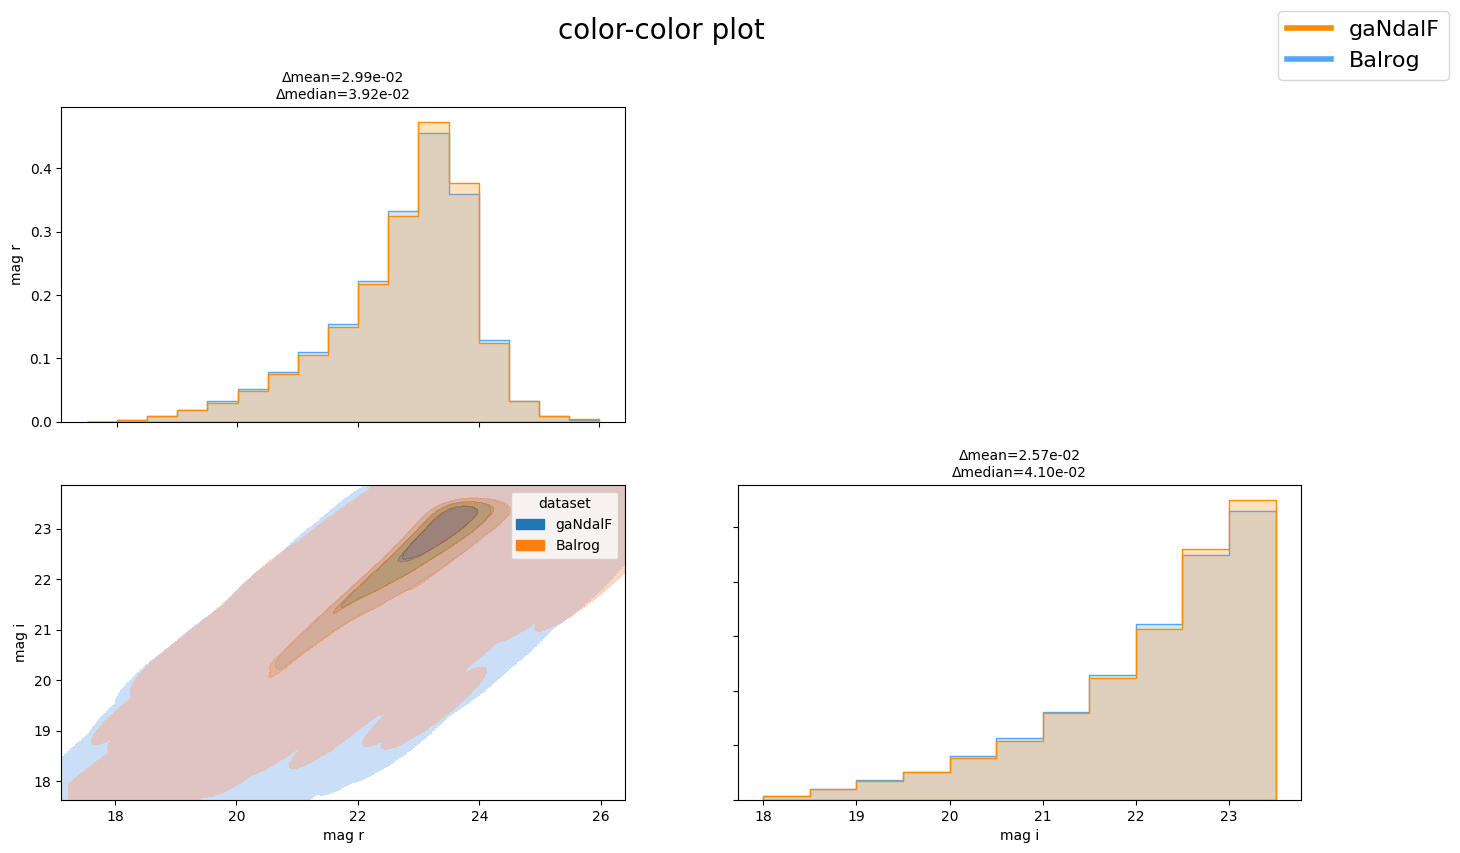

In [11]:
plot_compare_seaborn(
    data_frame_generated=df_gandalf_flw_sub_cut,
    data_frame_true=df_balrog_flw_sub_cut,
    dict_delta=None,
    epoch=None,
    title=f"color-color plot",
    columns=[
        # "Color unsheared MAG r-i",
        # "Color unsheared MAG i-z",
        "unsheared/mag_r",
        "unsheared/mag_i",
        # "unsheared/mag_z",
        # "unsheared/snr",
        # "unsheared/size_ratio",
        # "unsheared/weight",
        # "unsheared/T"
    ],
    labels=[
        # "r-i",
        # "i-z",
        "mag r",
        "mag i",
        # "mag z",
        # "snr",
        # "size ratio",
        # "weight",
        # "T"
    ],
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/color_color.png",
    ranges={
        # "Color unsheared MAG r-i": [-0.5, 1.5],
        # "Color unsheared MAG i-z": [-0.5, 1.5],
        "unsheared/mag_r": [18, 24.5],
        "unsheared/mag_i": [18, 24.5],
        # "unsheared/mag_z": [18, 24.5],
        # "unsheared/snr": [2, 100],
        # "unsheared/size_ratio": [-0.5, 5],
        # "unsheared/weight": [10, 80],
        # "unsheared/T": [0, 3.5]
    }
)